In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/NLPFinalProject/Dataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Generation,label
0,0,0,latest headlines on cnn business - google's go...,gpt2
1,1,1,china wants to take a victory lap over its han...,gpt2
2,2,2,coronavirus disinformation creates challenges ...,gpt2
3,3,3,china coronavirus: eating wild animals made il...,gpt2
4,4,4,china's economy could shrink for the first tim...,gpt2


In [ ]:
import pandas as pd
df = pd.read_csv("Dataset.csv")
df.head()

,Unnamed: 0,Generation,label
0,0,latest headlines on cnn business - google's go...,gpt2
1,1,china wants to take a victory lap over its han...,gpt2
2,2,coronavirus disinformation creates challenges ...,gpt2
3,3,china coronavirus: eating wild animals made il...,gpt2
4,4,china's economy could shrink for the first tim...,gpt2


In [ ]:
df.shape

(11726, 3)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Generation', 'label'], dtype='object')

In [ ]:
df.drop('Unnamed: 0.1', axis=1, inplace=True) 

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True) 

In [ ]:
df.head()

,Generation,label
0,latest headlines on cnn business - google's go...,gpt2
1,china wants to take a victory lap over its han...,gpt2
2,coronavirus disinformation creates challenges ...,gpt2
3,china coronavirus: eating wild animals made il...,gpt2
4,china's economy could shrink for the first tim...,gpt2


In [ ]:
df['len'] = df['Generation'].apply(lambda x: len(x.split(" ")))
df.head()

,Generation,label,len
0,latest headlines on cnn business - google's go...,gpt2,405
1,china wants to take a victory lap over its han...,gpt2,415
2,coronavirus disinformation creates challenges ...,gpt2,431
3,china coronavirus: eating wild animals made il...,gpt2,432
4,china's economy could shrink for the first tim...,gpt2,429


In [ ]:
df['label'].value_counts()

gpt2           1066
instructgpt    1066
human          1066
xlnet          1066
fair           1066
gpt            1066
ctrl           1066
pplm           1066
grover         1066
gpt3           1066
xlm            1066
Name: label, dtype: int64

In [ ]:
df['label'] = df['label'].replace({'gpt2': 0, 'instructgpt': 1, 'human': 2,'xlnet': 3,'fair': 4,'gpt': 5,'ctrl': 6,'pplm': 7,'grover': 8, 'gpt3': 9, 'xlm': 10})

In [ ]:
df['label'].value_counts()

0     1066
1     1066
2     1066
3     1066
4     1066
5     1066
6     1066
7     1066
8     1066
9     1066
10    1066
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_data = df['Generation']

In [ ]:
y_data = df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.2, stratify = y_data)

In [ ]:
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

In [ ]:
test_data = x_test.join(y_test)

In [ ]:
t0 = test_data[test_data['label']==0]
t1 = test_data[test_data['label']==1]
t2 = test_data[test_data['label']==2]
t3 = test_data[test_data['label']==3]
t4 = test_data[test_data['label']==4]
t5 = test_data[test_data['label']==5]
t6 = test_data[test_data['label']==6]
t7 = test_data[test_data['label']==7]
t8 = test_data[test_data['label']==8]
t9 = test_data[test_data['label']==9]
t10 = test_data[test_data['label']==10]

In [ ]:
t02 = t0.append(t2)
t12 = t1.append(t2)
t32 = t3.append(t2)
t42 = t4.append(t2)
t52 = t5.append(t2)
t62 = t6.append(t2)
t72 = t7.append(t2)
t82 = t8.append(t2)
t92 = t9.append(t2)
t102 = t10.append(t2)

<ipython-input-45-d9e17312b907>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t02 = t0.append(t2)
<ipython-input-45-d9e17312b907>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t12 = t1.append(t2)
<ipython-input-45-d9e17312b907>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t32 = t3.append(t2)
<ipython-input-45-d9e17312b907>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t42 = t4.append(t2)
<ipython-input-45-d9e17312b907>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t52 = t5.append(t2)
<ipython-input-45-d9e17312b907>:6: FutureWarning: 

In [ ]:
xt02 = t02["Generation"]
yt02 = t02["label"]
xt12 = t12["Generation"]
yt12 = t12["label"]
xt32 = t32["Generation"]
yt32 = t32["label"]
xt42 = t42["Generation"]
yt42 = t42["label"]
xt52 = t52["Generation"]
yt52 = t52["label"]
xt62 = t62["Generation"]
yt62 = t62["label"]
xt72 = t72["Generation"]
yt72 = t72["label"]
xt82 = t82["Generation"]
yt82 = t82["label"]
xt92 = t92["Generation"]
yt92 = t92["label"]
xt102 = t102["Generation"]
yt102 = t102["label"]

In [ ]:
from keras.utils import to_categorical

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout,GlobalMaxPool1D, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

In [ ]:
max_features = 88088
maxlen = 25
embedding_size = 200

In [ ]:
# preprocess input data
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
X = tokenizer.texts_to_sequences(x_train)
X_train = pad_sequences(X, maxlen=maxlen)

In [ ]:
tokenizer.fit_on_texts(list(xt02))
X = tokenizer.texts_to_sequences(xt02)
Xt02 = pad_sequences(X, maxlen=maxlen)
tokenizer.fit_on_texts(list(xt12))
X = tokenizer.texts_to_sequences(xt12)
Xt12 = pad_sequences(X, maxlen=maxlen)
tokenizer.fit_on_texts(list(xt32))
X = tokenizer.texts_to_sequences(xt32)
Xt32 = pad_sequences(X, maxlen=maxlen)
tokenizer.fit_on_texts(list(xt42))
X = tokenizer.texts_to_sequences(xt42)
Xt42 = pad_sequences(X, maxlen=maxlen)
tokenizer.fit_on_texts(list(xt52))
X = tokenizer.texts_to_sequences(xt52)
Xt52 = pad_sequences(X, maxlen=maxlen)
tokenizer.fit_on_texts(list(xt62))
X = tokenizer.texts_to_sequences(xt62)
Xt62 = pad_sequences(X, maxlen=maxlen)
tokenizer.fit_on_texts(list(xt72))
X = tokenizer.texts_to_sequences(xt72)
Xt72 = pad_sequences(X, maxlen=maxlen)
tokenizer.fit_on_texts(list(xt82))
X = tokenizer.texts_to_sequences(xt82)
Xt82 = pad_sequences(X, maxlen=maxlen)
tokenizer.fit_on_texts(list(xt92))
X = tokenizer.texts_to_sequences(xt92)
Xt92 = pad_sequences(X, maxlen=maxlen)
tokenizer.fit_on_texts(list(xt102))
X = tokenizer.texts_to_sequences(xt102)
Xt102 = pad_sequences(X, maxlen=maxlen)

In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

88088


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-03-30 15:08:50--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-03-30 15:08:51--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-03-30 15:08:51--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
glove_file = '/content/drive/MyDrive/NLPFinalProject/NLP Project/glove.6B.zip'
glove_file = 'glove.6B.zip'

In [ ]:
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [ ]:
EMBEDDING_FILE = '/content/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
len(embeddings.values())

400000

In [ ]:
X_train.shape

(9380, 25)

In [ ]:
embedding_size

200

In [ ]:
from tensorflow.keras.layers import GlobalMaxPooling1D

In [ ]:
# preprocess output data
y_tra = np.asarray(y_train)
y_tra = y_tra[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_train = to_categorical(y_tra, num_classes=11)

In [ ]:
# preprocess output data
y_tes = np.asarray(yt02)
y_tes = y_tes[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_tes_02 = to_categorical(y_tes, num_classes=11)
y_tes = np.asarray(yt12)
y_tes = y_tes[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_tes_12 = to_categorical(y_tes, num_classes=11)
y_tes = np.asarray(yt32)
y_tes = y_tes[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_tes_32 = to_categorical(y_tes, num_classes=11)
y_tes = np.asarray(yt42)
y_tes = y_tes[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_tes_42 = to_categorical(y_tes, num_classes=11)
y_tes = np.asarray(yt52)
y_tes = y_tes[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_tes_52 = to_categorical(y_tes, num_classes=11)
y_tes = np.asarray(yt62)
y_tes = y_tes[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_tes_62 = to_categorical(y_tes, num_classes=11)
y_tes = np.asarray(yt72)
y_tes = y_tes[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_tes_72 = to_categorical(y_tes, num_classes=11)
y_tes = np.asarray(yt82)
y_tes = y_tes[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_tes_82 = to_categorical(y_tes, num_classes=11)
y_tes = np.asarray(yt92)
y_tes = y_tes[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_tes_92 = to_categorical(y_tes, num_classes=11)
y_tes = np.asarray(yt102)
y_tes = y_tes[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_tes_102 = to_categorical(y_tes, num_classes=11)

In [ ]:
# check the shapes of X and y_one_hot
print(X_train.shape)
print(y_one_hot_train.shape)

# create the model
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen, weights=[embedding_matrix]))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())

model.add(Dense(11, activation="softmax"))

# compile and train the model
batch_size = 100
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_one_hot_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

(9380, 25)
(9380, 11)
Epoch 1/10
76/76 [==============================] - 21s 152ms/step - loss: 2.0436 - accuracy: 0.3118 - val_loss: 1.5411 - val_accuracy: 0.4462
Epoch 2/10
76/76 [==============================] - 6s 75ms/step - loss: 1.3068 - accuracy: 0.5457 - val_loss: 1.1962 - val_accuracy: 0.5576
Epoch 3/10
76/76 [==============================] - 5s 69ms/step - loss: 0.9944 - accuracy: 0.6541 - val_loss: 1.1142 - val_accuracy: 0.5720
Epoch 4/10
76/76 [==============================] - 4s 51ms/step - loss: 0.7990 - accuracy: 0.7252 - val_loss: 1.0814 - val_accuracy: 0.5890
Epoch 5/10
76/76 [==============================] - 2s 28ms/step - loss: 0.6227 - accuracy: 0.8010 - val_loss: 1.0381 - val_accuracy: 0.6333
Epoch 6/10
76/76 [==============================] - 3s 41ms/step - loss: 0.4675 - accuracy: 0.8586 - val_loss: 1.0648 - val_accuracy: 0.6215
Epoch 7/10
76/76 [==============================] - 3s 34ms/step - loss: 0.3188 - accuracy: 0.9142 - val_loss: 1.1454 - val_accura

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_one_hot_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_one_hot_tes, verbose=0)

In [ ]:
from matplotlib import pyplot

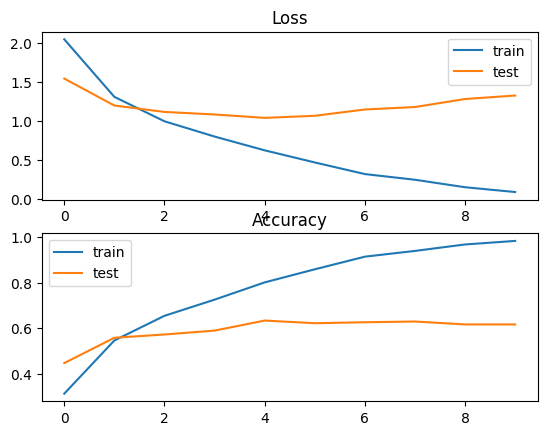

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
predictions_t02 = model.predict(Xt02)
predictions_t12 = model.predict(Xt12)
predictions_t32 = model.predict(Xt32)
predictions_t42 = model.predict(Xt42)
predictions_t52 = model.predict(Xt52)
predictions_t62 = model.predict(Xt62)
predictions_t72 = model.predict(Xt72)
predictions_t82 = model.predict(Xt82)
predictions_t92 = model.predict(Xt92)
predictions_t102 = model.predict(Xt102)

14/14 [==============================] - 0s 3ms/step


In [ ]:
predictions_t02

array([[3.6507130e-02, 1.1047325e-03, 3.8690459e-02, ..., 2.2941579e-01,
        1.9781372e-04, 1.5000187e-04],
       [1.5613709e-02, 8.0144547e-02, 3.7902221e-02, ..., 2.8844528e-02,
        2.4283949e-04, 2.3316092e-05],
       [7.1634329e-03, 3.0628038e-03, 1.7998289e-02, ..., 8.1437588e-01,
        1.7640461e-03, 2.0552035e-05],
       ...,
       [3.5753101e-02, 7.9398733e-03, 1.2794407e-01, ..., 7.2131842e-01,
        1.7673111e-03, 2.0525335e-04],
       [4.5513995e-02, 6.5998054e-01, 5.1354058e-02, ..., 1.2638651e-02,
        9.5325941e-03, 2.5868573e-04],
       [6.4196060e-03, 5.8026724e-02, 2.5329131e-01, ..., 2.9030571e-02,
        5.6452894e-01, 1.1130380e-03]], dtype=float32)

In [ ]:
y_pred_one_hot_02 = np.argmax(predictions_t02, axis=1)
y_test_one_hot_02 = np.argmax(y_one_hot_tes_02, axis=1)
y_pred_one_hot_12 = np.argmax(predictions_t12, axis=1)
y_test_one_hot_12 = np.argmax(y_one_hot_tes_12, axis=1)
y_pred_one_hot_32 = np.argmax(predictions_t32, axis=1)
y_test_one_hot_32 = np.argmax(y_one_hot_tes_32, axis=1)
y_pred_one_hot_42 = np.argmax(predictions_t42, axis=1)
y_test_one_hot_42 = np.argmax(y_one_hot_tes_42, axis=1)
y_pred_one_hot_52 = np.argmax(predictions_t52, axis=1)
y_test_one_hot_52 = np.argmax(y_one_hot_tes_52, axis=1)
y_pred_one_hot_62 = np.argmax(predictions_t62, axis=1)
y_test_one_hot_62 = np.argmax(y_one_hot_tes_62, axis=1)
y_pred_one_hot_72 = np.argmax(predictions_t72, axis=1)
y_test_one_hot_72 = np.argmax(y_one_hot_tes_72, axis=1)
y_pred_one_hot_82 = np.argmax(predictions_t82, axis=1)
y_test_one_hot_82 = np.argmax(y_one_hot_tes_82, axis=1)
y_pred_one_hot_92 = np.argmax(predictions_t92, axis=1)
y_test_one_hot_92 = np.argmax(y_one_hot_tes_92, axis=1)
y_pred_one_hot_102 = np.argmax(predictions_t102, axis=1)
y_test_one_hot_102 = np.argmax(y_one_hot_tes_102, axis=1)

In [ ]:
f1_macro_02 = f1_score(y_test_one_hot_02, y_pred_one_hot_02, average="macro")
print("F1 macro score:", f1_macro_02)
f1_macro_12 = f1_score(y_test_one_hot_12, y_pred_one_hot_12, average="macro")
print("F1 macro score:", f1_macro_12)
f1_macro_32 = f1_score(y_test_one_hot_32, y_pred_one_hot_32, average="macro")
print("F1 macro score:", f1_macro_32)
f1_macro_42 = f1_score(y_test_one_hot_42, y_pred_one_hot_42, average="macro")
print("F1 macro score:", f1_macro_42)
f1_macro_52 = f1_score(y_test_one_hot_52, y_pred_one_hot_52, average="macro")
print("F1 macro score:", f1_macro_52)
f1_macro_62 = f1_score(y_test_one_hot_62, y_pred_one_hot_62, average="macro")
print("F1 macro score:", f1_macro_62)
f1_macro_72 = f1_score(y_test_one_hot_72, y_pred_one_hot_72, average="macro")
print("F1 macro score:", f1_macro_72)
f1_macro_82 = f1_score(y_test_one_hot_82, y_pred_one_hot_82, average="macro")
print("F1 macro score:", f1_macro_82)
f1_macro_92 = f1_score(y_test_one_hot_92, y_pred_one_hot_92, average="macro")
print("F1 macro score:", f1_macro_92)
f1_macro_102 = f1_score(y_test_one_hot_102, y_pred_one_hot_102, average="macro")
print("F1 macro score:", f1_macro_102)

F1 macro score: 0.07744500224318945
F1 macro score: 0.02526315789473684
F1 macro score: 0.08635893538504931
F1 macro score: 0.045703479947935846
F1 macro score: 0.06870859636817084
F1 macro score: 0.0790925463229903
F1 macro score: 0.046589114619271
F1 macro score: 0.060473047243759924
F1 macro score: 0.02898414851556217
F1 macro score: 0.0822882288228823
